<a href="https://colab.research.google.com/github/FlanagG21/DataWrangling/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Create a dataframe "df" that gets the house pricing data of our cleaned data set
df = pd.read_csv('/cleaned_house_data.csv')
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,0.0,460,RFn,...,80.0,0.0,0,8,6,1262,0.0,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,0.0,2001,2002,223500
3,961,0.0,0.0,No,216,ALQ,540,0.0,642,Unf,...,60.0,0.0,35,5,7,756,0.0,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,0.0,2000,2000,250000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1460 non-null   float64
 2   BedroomAbvGr   1460 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1423 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  1460 non-null   float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1379 non-null   object 
 10  GarageYrBlt    1460 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1460 non-null   float64
 15  MasVnrArea     1460 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

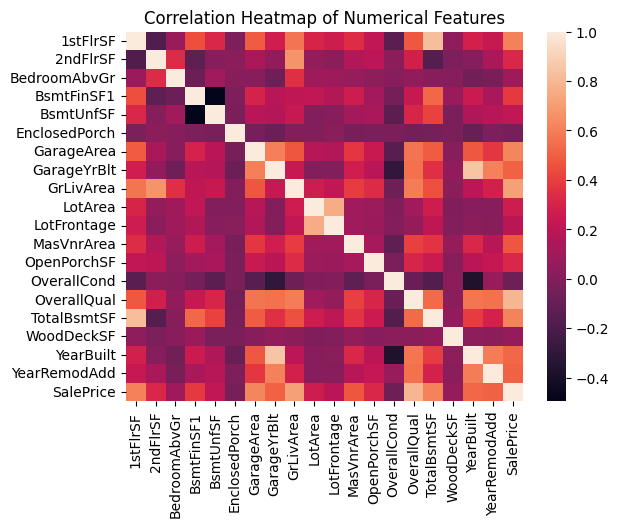

In [ ]:
sns.heatmap(df.select_dtypes(include=np.number).corr()) #create a corelation heatmap of non-numeric data
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

The heat map shows that total basement square footage correlates strongly with the square footage of the first floor which makes alot of sense. Generally floor sizes are pretty similar. That said the second floor square footage correlates negativly with first floor square footage which seems a little contradictory. Let's look into both and see if we can spot any patterns

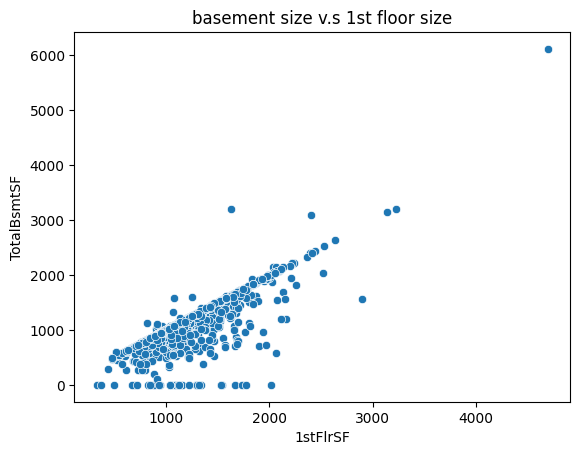

In [9]:
sns.scatterplot(data= df, x='1stFlrSF', y='TotalBsmtSF')
plt.title('basement size v.s 1st floor size')
plt.show()

The basement square footage looks almost one to one with the first floor square footage, and almost never goes above a clear line. This indicates that most houses in this data set have basements and that basements in general are smaller than or equal to in size to the size of the first floor of the house

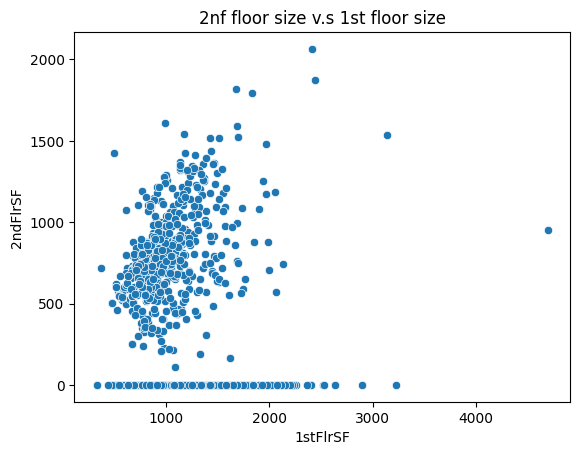

In [10]:
sns.scatterplot(data= df, x='1stFlrSF', y='2ndFlrSF')
plt.title('2nf floor size v.s 1st floor size')
plt.show()

The second floor seems to have two clusters, namely something that seems to correlate slightly with the first floor size and houses that don't have a second floor. Graphing only the houses with second floors may reveal more information

<Axes: xlabel='1stFlrSF', ylabel='2ndFlrSF'>

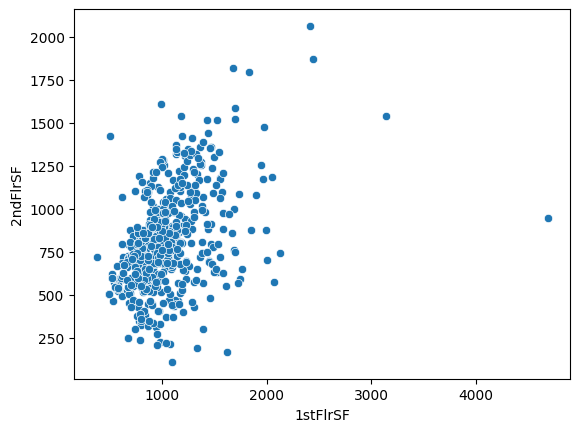

In [12]:
dfNonZero2ndFloor = df[df['2ndFlrSF'] != 0]
sns.scatterplot(data= dfNonZero2ndFloor, x='1stFlrSF', y='2ndFlrSF')

There is a clear correlation here, through it has some variation. It seems that the size of a second floor in a house is positivley related to the size of the first floor but there is more variation than that of the first floor v.s the size of the basement

In [14]:
correlationNon0 = dfNonZero2ndFloor[['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF']].corr()
correlation = df[['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF']].corr()
print(f"The correlation between 1stFlrSF and 2ndFlrSF (for houses with non-zero 2nd floor SF) is:\n{correlationNon0}")
print(f"The correlation between 1stFlrSF and 2ndFlrSF (for houses includeing zero 2nd floor SF) is:\n{correlation}")

The correlation between 1stFlrSF and 2ndFlrSF (for houses with non-zero 2nd floor SF) is:
             1stFlrSF  2ndFlrSF  TotalBsmtSF
1stFlrSF     1.000000  0.424856     0.810498
2ndFlrSF     0.424856  1.000000     0.410430
TotalBsmtSF  0.810498  0.410430     1.000000
The correlation between 1stFlrSF and 2ndFlrSF (for houses includeing zero 2nd floor SF) is:
             1stFlrSF  2ndFlrSF  TotalBsmtSF
1stFlrSF     1.000000 -0.184843     0.819530
2ndFlrSF    -0.184843  1.000000    -0.161033
TotalBsmtSF  0.819530 -0.161033     1.000000


The correlation tables back up the idea that basement size correlates with the size of the 1st floor far more than the 1st floor does with the 2nd floor. It also backs up the idea that the second floor does correlate with the 1st floor provided the 2nd floor exists which is not garunteed